In [2]:
import pandas as pd
import geopandas as gp
import os

# Blue_Township_Subdistricts_05_30_24

We received a request to dissolve a precinct file by its township column to generate subdistricts and intersect these subdistricts by the geometries for Blue Township.

In [3]:
os.listdir()

['raw-from-source',
 '.DS_Store',
 'blue_township_mo_subdistricts_23.zip',
 'README.ipynb',
 'blue_township_mo_subdistricts_23',
 'raw-from-source.zip',
 '.ipynb_checkpoints',
 'readme_blue_township_mo_subdistricts_23.txt',
 'Blue_Township_Subdistricts_05_30_24.ipynb']

In [22]:
blue_precs = gp.read_file("./raw-from-source/Jackson_7 2023 files/Jackson_County_7-2023.shp")
jackson_mo = gp.read_file("./raw-from-source/jackson_mo_townships/jackson_mo_townships.shp")

In [23]:
jackson_county_boundaries = blue_precs.dissolve("Townships")

In [33]:
blue_precs.columns

Index(['OBJECTID', 'County', 'SHAPE_Leng', 'SHAPE_Area', 'Townships',
       'Appellate', 'City', 'Fire', 'School', 'Sewer', 'Township', 'Water',
       'Judicial', 'Precinct', 'Precinct_S', 'Precincts', 'Sqaure_Mil',
       'County_Exe', 'Township_C', 'KCLIB_DIST', 'US_Senate_', 'US_Senate1',
       'Part', 'Transporat', 'Spec_Distr', 'JC_Leg_202', 'JC_At_Larg',
       'MO_Senate_', 'MO_House_2', 'US_Congr_1', 'MCC_2022', 'Ward2022',
       'geometry'],
      dtype='object')

In [34]:
blue_precs

,OBJECTID,County,SHAPE_Leng,SHAPE_Area,Townships,Appellate,City,Fire,School,Sewer,...,Transporat,Spec_Distr,JC_Leg_202,JC_At_Larg,MO_Senate_,MO_House_2,US_Congr_1,MCC_2022,Ward2022,geometry
0,2418,0,33634.498498,4.880223e+07,B2,W,IN,n/a,IN,None,...,None,None,3,1,11,20,5,4,IN01,"POLYGON ((2815252.226 1078414.227, 2815168.263..."
1,2403,0,83448.149515,1.119219e+08,SN,W,UN,SV,R6,None,...,None,None,5,1,11,32,4,5,None,"POLYGON ((2894381.168 1043837.762, 2893069.447..."
2,2325,0,11742.757518,7.446306e+06,B7,W,IN,n/a,C2,None,...,None,None,3,1,11,29,5,5,IN04,"POLYGON ((2807484.939 1047213.115, 2807492.649..."
3,2326,0,4199.341950,4.715097e+05,B7,W,IN,n/a,C2,None,...,None,None,2,2,11,29,5,3,IN04,"POLYGON ((2804913.306 1048829.826, 2805077.569..."
4,2407,0,59611.580535,4.397334e+07,SN,W,OG,SV,R6,None,...,None,None,5,1,11,32,4,5,OG03,"POLYGON ((2897892.563 1033297.678, 2897876.698..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,2924,0,3302.552428,3.283386e+05,SN,W,UN,CJ,R5,None,...,None,None,5,1,8,33,4,5,None,"POLYGON ((2866596.557 1039794.843, 2866597.520..."
643,2926,0,16246.910114,5.809013e+06,SN,W,UN,SV,R5,None,...,None,None,5,1,11,32,4,5,None,"POLYGON ((2884910.139 1035177.295, 2882400.568..."
644,2927,0,4119.693267,5.206756e+05,SN,W,UN,SV,R6,None,...,None,None,5,1,11,32,4,5,None,"POLYGON ((2888670.029 1028500.335, 2888633.993..."
645,2928,0,3420.792823,1.317431e+05,SN,W,OG,SV,R6,None,...,None,None,5,1,8,32,4,5,None,"POLYGON ((2891314.974 1028374.746, 2891373.370..."


In [25]:
jackson_county_boundaries.reset_index(inplace = True, drop = False)

<AxesSubplot: >

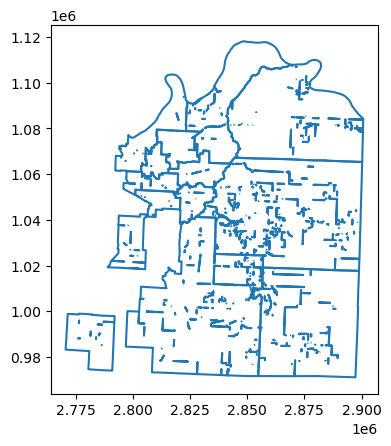

In [27]:
jackson_county_boundaries.boundary.plot()

In [39]:
jackson_county_boundaries.index = jackson_county_boundaries["Townships"]

In [35]:
mo_blocks = gp.read_file("/Users/peterhorton/Documents/RDH/raw_data/census/2020_TIGER_B/mo_b_2020_bound.zip")

In [43]:
mo_blocks_pl = pd.read_csv("/Users/peterhorton/Documents/RDH/raw_data/census/2020_PL_csv/mo_pl2020_b/mo_pl2020_b.csv")

/var/folders/1t/0q4w6hm92mg_zxd84dfxmq3m0000gn/T/ipykernel_34461/3867505952.py:1: DtypeWarning: Columns (55) have mixed types. Specify dtype option on import or set low_memory=False.
  mo_blocks_pl = pd.read_csv("/Users/peterhorton/Documents/RDH/raw_data/census/2020_PL_csv/mo_pl2020_b/mo_pl2020_b.csv")


In [47]:
mo_blocks_pl[['PLACE',
 'PLACECC',
 'PLACENS',]]



,PLACE,PLACECC,PLACENS
0,99999,99,99999999
1,99999,99,99999999
2,99999,99,99999999
3,99999,99,99999999
4,99999,99,99999999
...,...,...,...
253627,65000,C7,767557
253628,65000,C7,767557
253629,65000,C7,767557
253630,65000,C7,767557


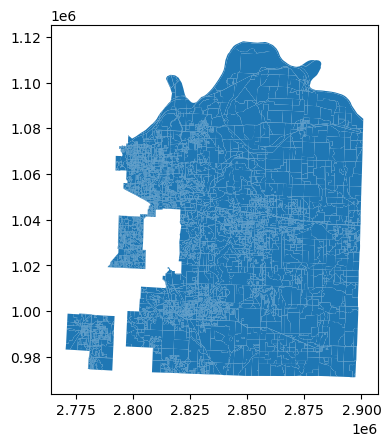

In [37]:
mo_blocks = mo_blocks.to_crs(jackson_county_boundaries.crs)

In [42]:
mo_blocks

,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,UR20,UACE20,UATYPE20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry,TOWNSHIP
0,29,189,212300,4005,291892123004005,Block 4005,G5040,None,None,None,S,44889,0,+38.7125379,-090.3026580,"POLYGON ((3986234.129 954302.631, 3986255.063 ...",NaN
1,29,091,090700,4007,290910907004007,Block 4007,G5040,None,None,None,S,73095,0,+36.7238569,-091.8419130,"POLYGON ((3567372.686 213426.403, 3567371.434 ...",NaN
2,29,091,090200,1043,290910902001043,Block 1043,G5040,None,None,None,S,2022135,357,+37.0100857,-091.6646296,"POLYGON ((3614017.219 317287.217, 3614027.290 ...",NaN
3,29,091,090300,1025,290910903001025,Block 1025,G5040,None,None,None,S,7484,0,+36.9773414,-091.8437384,"POLYGON ((3564250.512 305815.344, 3564305.208 ...",NaN
4,29,091,090700,2027,290910907002027,Block 2027,G5040,None,None,None,S,23837,0,+36.7593260,-091.8503270,"POLYGON ((3565031.706 227383.496, 3565049.493 ...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253627,29,029,950201,2023,290299502012023,Block 2023,G5040,None,None,None,S,0,123905,+38.1454066,-092.6443175,"POLYGON ((3321804.308 725171.723, 3321808.747 ...",NaN
253628,29,123,960300,1048,291239603001048,Block 1048,G5040,None,None,None,S,1306563,994,+37.4981832,-090.2632874,"POLYGON ((4016046.577 513050.661, 4016276.444 ...",NaN
253629,29,123,960201,2071,291239602012071,Block 2071,G5040,None,None,None,S,19767,193,+37.5520788,-090.3224431,"POLYGON ((3999808.976 531801.174, 3999871.937 ...",NaN
253630,29,029,950801,3001,290299508013001,Block 3001,G5040,None,None,None,S,0,946169,+38.0688341,-092.8676843,"POLYGON ((3256336.906 694243.074, 3256352.540 ...",NaN


In [61]:
kc_blocks = mo_blocks_pl[mo_blocks_pl["PLACENS"]==2395492]["GEOID"].str[9:].unique()
non_kc_blocks = mo_blocks[(mo_blocks["COUNTYFP20"]=="095")&~(mo_blocks["GEOID20"].isin(kc_blocks))]

In [62]:
import maup
non_kc_blocks["TOWNSHIP"] = maup.assign(non_kc_blocks,jackson_county_boundaries)

/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/maup/indexed_geometries.py:16: ShapelyDeprecationWarning: STRtree will be changed in 2.0.0 and will not be compatible with versions < 2.
  self.spatial_index = STRtree(self.geometries)
/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/maup/indexed_geometries.py:16: ShapelyDeprecationWarning: STRtree will be changed in 2.0.0 and will not be compatible with versions < 2.
  self.spatial_index = STRtree(self.geometries)
/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ign

In [65]:
jackson_townships = non_kc_blocks.dissolve("TOWNSHIP")

In [68]:
jackson_townships.reset_index(inplace = True, drop = False)

In [77]:
jackson_townships["NAME"] = jackson_townships["TOWNSHIP"].map({'B1': 'Blue 1',
 'B2': 'Blue 2',
 'B3': 'Blue 3',
 'B4': 'Blue 4',
 'B5': 'Blue 5',
 'B6': 'Blue 6',
 'B7': 'Blue 7',
 'B8': 'Blue 8',
 'BR': 'Brooking',
 'FO': 'Fort Osage',
 'PR': 'Prairie',
 'SN': 'Sni-a-Bar',
 'VB': 'Van Buren',
 'WA': 'Washington'})

/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [78]:
jackson_townships = jackson_townships[["TOWNSHIP","NAME","geometry"]]

In [84]:
jackson_townships.to_file("./jackson_mo_townships/jackson_mo_townships.shp")

/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/geopandas/io/file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


,TOWNSHIP,geometry
0,B1,"POLYGON ((2797173.726 1061316.786, 2797181.322..."
1,B2,"POLYGON ((2812365.570 1069052.553, 2812377.210..."
2,B3,"POLYGON ((2828156.648 1071173.005, 2828114.695..."
3,B4,"POLYGON ((2805003.235 1059118.548, 2805025.396..."
4,B5,"POLYGON ((2799162.358 1051798.622, 2798403.162..."
5,B6,"POLYGON ((2820371.328 1055130.923, 2820357.089..."
6,B7,"POLYGON ((2806555.392 1044536.785, 2806517.564..."
7,B8,"POLYGON ((2821520.244 1038260.553, 2821496.399..."
8,BR,"POLYGON ((2792404.315 1019078.636, 2792077.621..."
9,FO,"POLYGON ((2847515.487 1067041.150, 2847510.102..."


<AxesSubplot: >

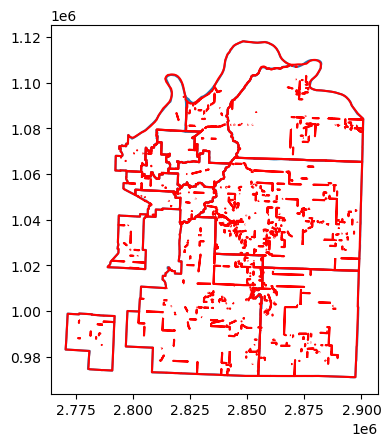

In [74]:
ax = jackson_townships.boundary.plot()
jackson_county_boundaries.boundary.plot(color = "red", ax=ax)

In [12]:
mo_places = gp.read_file("/Users/peterhorton/Downloads/tl_2023_29_place.zip")

<AxesSubplot: >

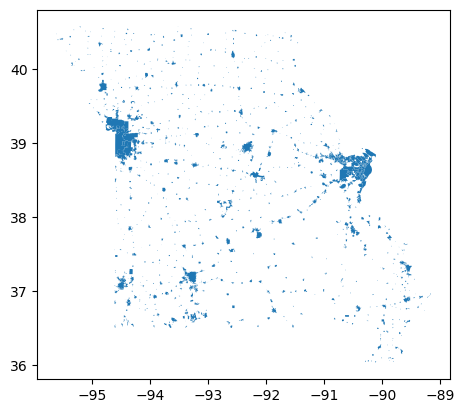

In [14]:
mo_places.plot()

In [9]:
blue_precs

,OBJECTID,County,SHAPE_Leng,SHAPE_Area,Townships,Appellate,City,Fire,School,Sewer,...,Transporat,Spec_Distr,JC_Leg_202,JC_At_Larg,MO_Senate_,MO_House_2,US_Congr_1,MCC_2022,Ward2022,geometry
0,2418,0,33634.498498,4.880223e+07,B2,W,IN,n/a,IN,None,...,None,None,3,1,11,20,5,4,IN01,"POLYGON ((2815252.226 1078414.227, 2815168.263..."
1,2403,0,83448.149515,1.119219e+08,SN,W,UN,SV,R6,None,...,None,None,5,1,11,32,4,5,None,"POLYGON ((2894381.168 1043837.762, 2893069.447..."
2,2325,0,11742.757518,7.446306e+06,B7,W,IN,n/a,C2,None,...,None,None,3,1,11,29,5,5,IN04,"POLYGON ((2807484.939 1047213.115, 2807492.649..."
3,2326,0,4199.341950,4.715097e+05,B7,W,IN,n/a,C2,None,...,None,None,2,2,11,29,5,3,IN04,"POLYGON ((2804913.306 1048829.826, 2805077.569..."
4,2407,0,59611.580535,4.397334e+07,SN,W,OG,SV,R6,None,...,None,None,5,1,11,32,4,5,OG03,"POLYGON ((2897892.563 1033297.678, 2897876.698..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,2924,0,3302.552428,3.283386e+05,SN,W,UN,CJ,R5,None,...,None,None,5,1,8,33,4,5,None,"POLYGON ((2866596.557 1039794.843, 2866597.520..."
643,2926,0,16246.910114,5.809013e+06,SN,W,UN,SV,R5,None,...,None,None,5,1,11,32,4,5,None,"POLYGON ((2884910.139 1035177.295, 2882400.568..."
644,2927,0,4119.693267,5.206756e+05,SN,W,UN,SV,R6,None,...,None,None,5,1,11,32,4,5,None,"POLYGON ((2888670.029 1028500.335, 2888633.993..."
645,2928,0,3420.792823,1.317431e+05,SN,W,OG,SV,R6,None,...,None,None,5,1,8,32,4,5,None,"POLYGON ((2891314.974 1028374.746, 2891373.370..."


In [4]:
blue = jackson_mo[jackson_mo["NAMELSAD"]=="Blue township"]
blue_precs = blue_precs.to_crs(jackson_mo.crs)
twsps = blue_precs.dissolve("Townships")
twsps.reset_index(inplace = True, drop = False)

In [5]:
comb2 = gp.overlay(blue, twsps, how = "intersection")
comb2 = comb2[~comb2["Townships"].isin(["BR","FO","PR","SN"])]
comb2 = gp.GeoDataFrame(comb2[["Townships","geometry"]])
comb2.to_file("./blue_township_mo_subdistricts_23/blue_township_mo_subdistricts_23.shp")

/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/geopandas/geoseries.py:843: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, s in self.geometry.iteritems():
/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/geopandas/io/file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [6]:
import shutil

In [7]:
shutil.make_archive("./blue_township_mo_subdistricts_23","zip","./blue_township_mo_subdistricts_23")

'/Users/peterhorton/Documents/RDH/Support/Processing-Requests/Blue_Township_Subdistricts_05_30_24/blue_township_mo_subdistricts_23.zip'